In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

import datetime
%matplotlib inline

In [2]:
houses = pd.read_csv("data/King_County_House_prices_dataset.csv")

houses.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
houses.shape
houses.eval("price_per_sqft = price / sqft_living", inplace=True)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429


In [509]:
houses.dropna(how='any', subset=['view', 'waterfront'], inplace=True)

In [510]:
houses.shape

(19164, 21)

In [497]:
view_nan_index = []

for i, v in enumerate(houses["view"].isnull()):
    if v:
        view_nan_index.append(i)
            
len(view_nan_index)

63

In [498]:
houses.drop(view_nan_index, axis=0, inplace=True)
houses.shape

(21534, 21)

In [827]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
count,1.916400e+04,1.916400e+04,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,15762.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,4.594087e+09,5.414490e+05,3.374452,2.117029,2082.038301,1.506174e+04,1.495173,0.007566,0.231058,3.409987,7.660718,1791.425433,1971.039553,82.440236,98077.726466,47.560018,-122.214011,1987.221874,12797.653882,264.418694
std,2.876912e+09,3.709009e+05,0.928676,0.769241,921.918226,4.077215e+04,0.540308,0.086657,0.763368,0.650456,1.175601,831.776073,29.388020,397.212626,53.448716,0.138661,0.140728,684.787028,27552.634083,110.264143
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235
25%,2.124077e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,182.189185
50%,3.905082e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000,244.889146
75%,7.334501e+09,6.439625e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2217.750000,1997.000000,0.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.250000,318.965517
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.138889


In [502]:
water_nan_index = []

for i, v in enumerate(houses["waterfront"].isnull()):
    if v:
        water_nan_index.append(i)
         
#diff = lambda l1,l2: [x for x in l1 if x not in l2]
#water_nan_index = diff(water_nan_index, view_nan_index)
len(water_nan_index)

2083

In [501]:
houses.drop(water_nan_index, axis=0, inplace=True)
houses.shape

(19173, 21)

In [825]:
cols = ['price_per_sqft', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'yr_built']

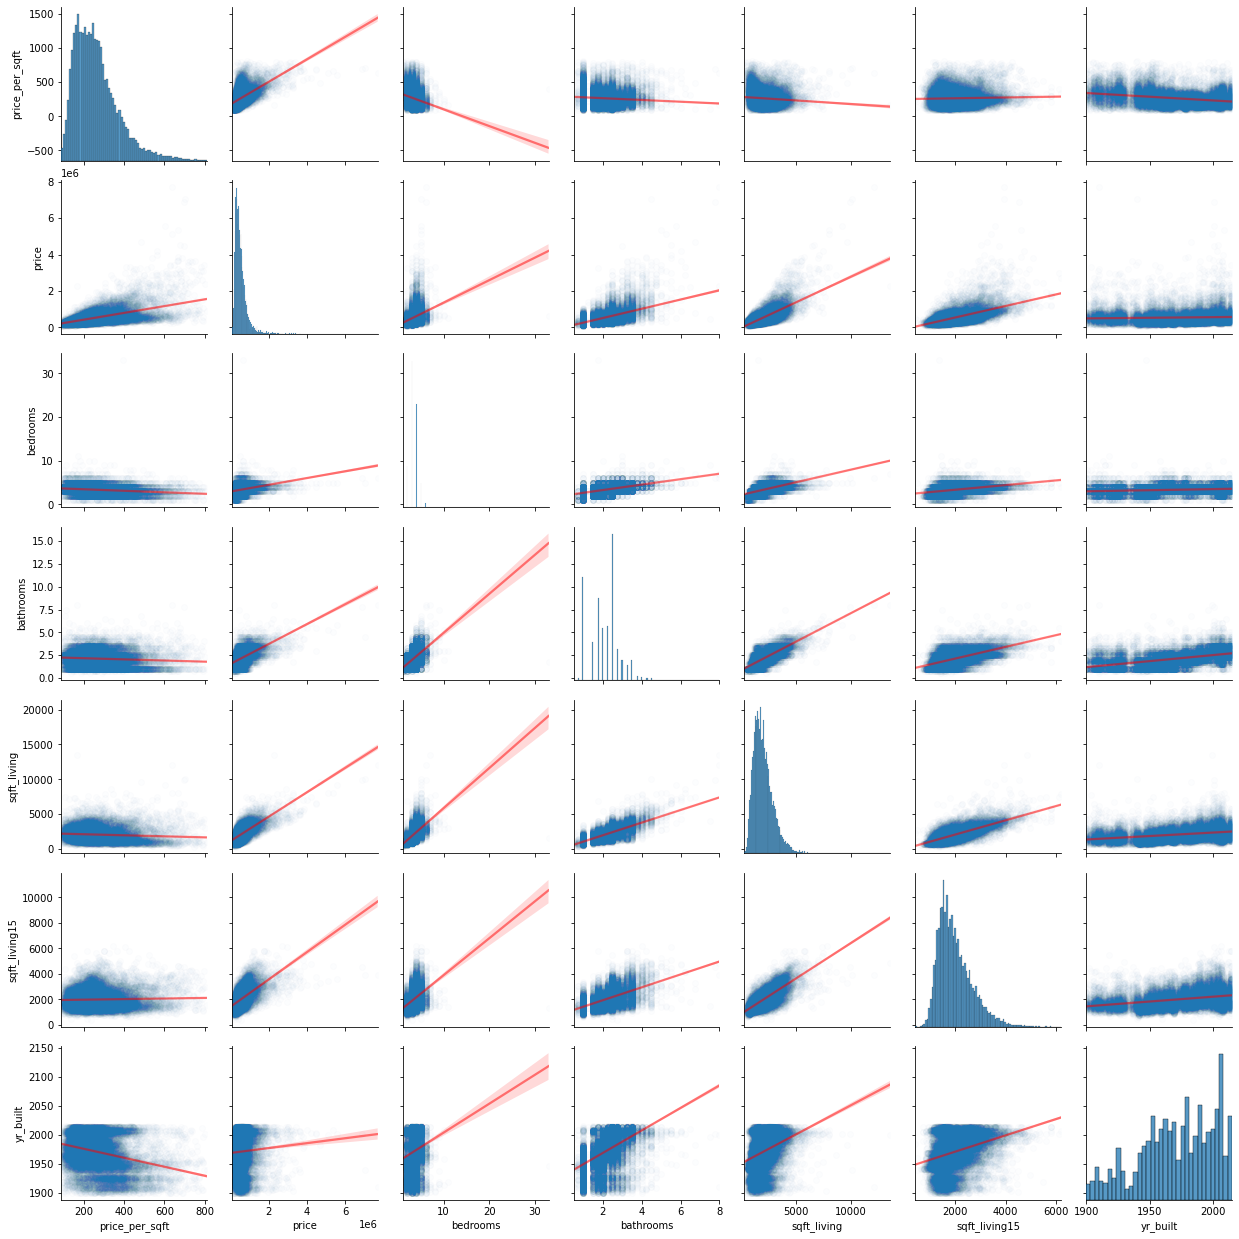

In [826]:
sns.pairplot(houses[cols], kind="reg", 
             plot_kws={'line_kws':{'color':'red', 'alpha': 0.5}, 
                       'scatter_kws': {'alpha': 0.01}});

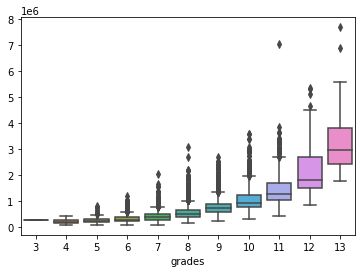

In [40]:
sns.boxplot(x=houses[cols[-1]].values, y=houses.price.values, data=houses)
plt.xlabel("grades");

Text(0.5, 0, 'bedrooms')

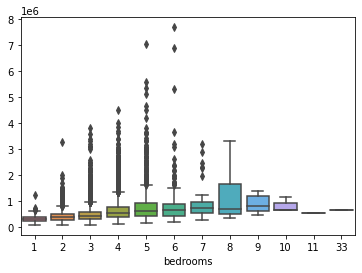

In [41]:
sns.boxplot(x=houses.bedrooms.values, y=houses.price.values, data=houses)
plt.xlabel("bedrooms")

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in true_divide



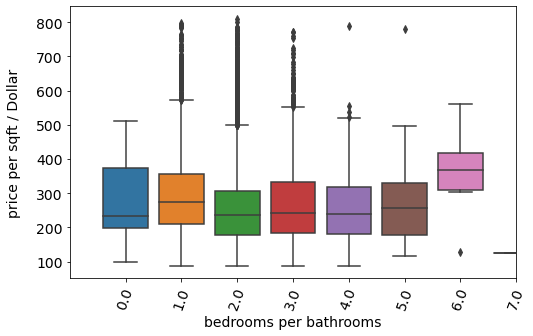

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x=np.round(np.round(houses.bedrooms.values)/np.round(houses.bathrooms.values)), y=houses.price_per_sqft.values, data=houses)
plt.xticks(rotation=70);
plt.xlabel("bedrooms per bathrooms", fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim((-1, 7));

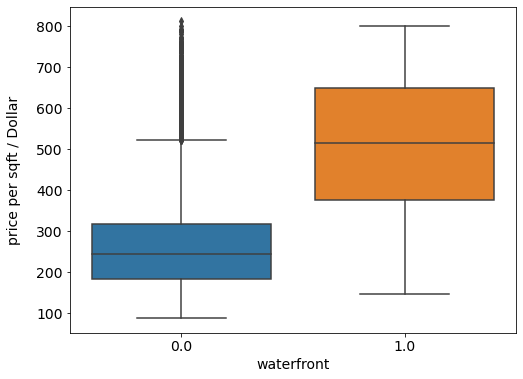

In [883]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=houses.waterfront.values, y=houses.price_per_sqft.values, data=houses)
plt.xlabel("waterfront", fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

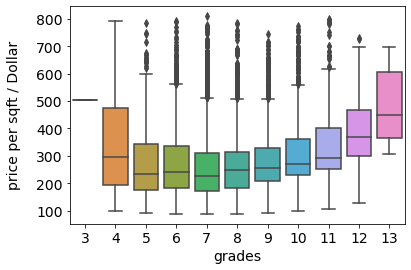

In [884]:
sns.boxplot(x=houses.grade.values, y=houses.price_per_sqft.values, data=houses)
plt.xlabel("grades", fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

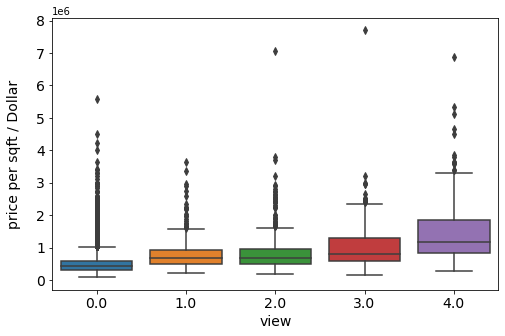

In [904]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=houses.view.values, y=houses.price.values, data=houses)
plt.xlabel("view", fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [786]:
houses.eval("price_per_sqft = price / sqft_living", inplace=True)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,226.937269


In [900]:
#groupy = houses.groupby("sqft_lot").median()
#groupy.price_per_sqft.plot()
#sns.relplot(x=houses.sqft_lot.values, y=houses.price_per_sqft.values, data=houses, kind="line")
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_per_sqft',
       'lot_round'],
      dtype='object')

In [936]:
bins = [i for i in range(1900, 2023, 10)]
labels = [str(bins[i])+"-"+str(bins[i+1]) for i in range(len(bins)-1)]

yr_binned = pd.cut(houses.yr_built, bins=bins, labels=labels)
#houses_binned
yr_binned.name = "yr_binned"

houses_binned = pd.concat([houses, yr_binned], axis=1)
houses_binned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,lot_round,yr_binned
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,7.0,1950-1960
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234,10.0,1930-1940
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265,5.0,1960-1970
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429,8.0,1980-1990
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,226.937269,102.0,2000-2010


In [906]:
dummyhouses = houses.copy()

dummyhouses.dropna(how='any', subset=['view', 'waterfront', 'yr_renovated'], inplace=True)

In [913]:
renovated = []
for value in dummyhouses.yr_renovated.values:
    if value > 0:
        renovated.append(1)
    else:
        renovated.append(0)

              

In [915]:
dummyhouses["renovated"] = renovated
#dummyhouses.head()
#houses.dropna(how='any', subset=['view', 'waterfront'], inplace=True)
#dummy_series = dummy_series.astype(int)
#
#dummy_series.name = "never_renovated"
#
#houses_binned = pd.concat([houses_binned, dummy_series], axis=1)
#
#houses_binned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,lot_round,renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,7.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265,5.0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429,8.0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,226.937269,102.0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,150.145773,7.0,0


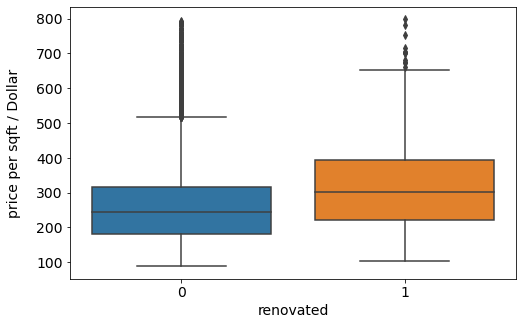

In [917]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=dummyhouses.renovated.values, y=dummyhouses.price_per_sqft.values, data=dummyhouses)
plt.xlabel("renovated", fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

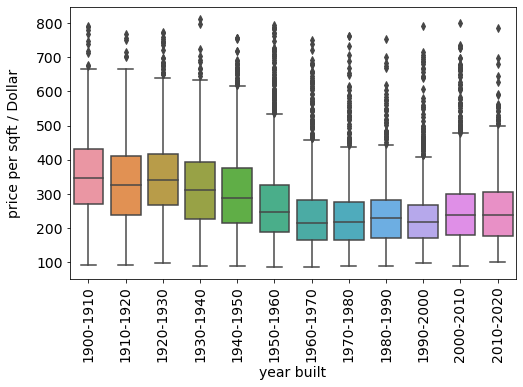

In [945]:
grouped = houses_binned.groupby("yr_binned").median()

fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x=houses_binned["yr_binned"].values, y=houses_binned.price_per_sqft.values, data=houses_binned)
plt.xlabel("year built", fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14);

In [933]:
dates = houses.date.tolist()

dummyyy = houses.copy()
dummyyy['datetimes'] = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dates]

dummyyy = dummyyy.groupby("datetimes").median()


dummyyy.plot(x="datetimes", y="price", data=dummyyy)

#x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dates]
#y_values = dummyyy.price.values

#plt.plot(x_values, y_values)

KeyError: 'datetimes'

# Long Lat Plot

# Correlation Matrix

In [934]:
X_dum=houses.copy()
columns_to_drop = ["id", "date", "zipcode"]
for col in columns_to_drop:
    X_dum.drop(col, axis=1, inplace=True)

X_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft', 'lot_round'],
      dtype='object')

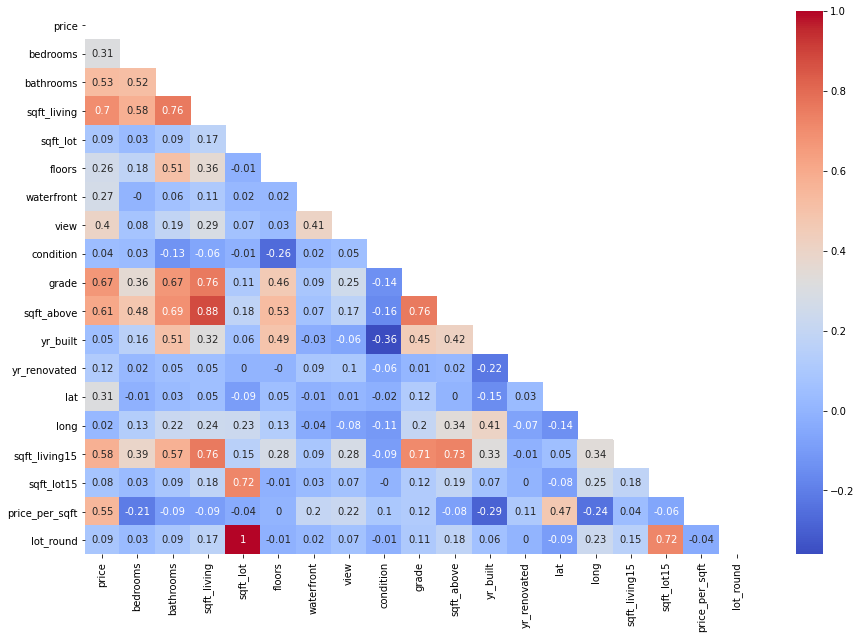

In [935]:
mask = np.triu(X_dum.corr())

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(round(X_dum.corr(),2)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')

#plt.savefig('figures/correlogram.png')

In [775]:
#variables = ["sqft_living", "bathrooms", "bedrooms", "grade", "sqft_above", "sqft_living15", "view"]

variables = ["sqft_living", "grade", "waterfront", "yr_built"]

In [776]:
train, test = train_test_split(houses, train_size = 0.8)
model = linear_model.LinearRegression()
model.fit(train[variables], train["price"])

LinearRegression()

In [777]:
model.intercept_

-594981.2292062052

In [778]:
model.coef_

array([1.79155249e+02, 9.87205355e+04, 8.77971862e+05])

In [779]:
model.score(train[variables], train['price'])

0.5754258189340458

In [780]:
model.score(test[variables], test['price'])

0.5716572463427831

In [781]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [782]:
predicted_values = model.predict(test[variables])

In [783]:
mape(test["price"], predicted_values)

0.33353360305919055

# zipcode, view, grade dummies

In [28]:
sns.kdeplot(houses.long, houses.lat, cmap="Reds", hue="price_bin", shade=True, bw=.15)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.



ValueError: Could not interpret value `price` for parameter `hue`

In [20]:
x = houses.long.values
y = houses.lat.values

grouped = houses.groupby("lat")

def prices(x, y):
    pass 
           

X, Y = np.meshgrid(x, y)

In [21]:
grouped.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,8/13/2014,679950.0,5,2.75,3600,9437,2.0,0.0,0.0,...,3600,0.0,2014,0.0,98059,47.4822,-122.131,3550,9421,188.875000
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,...,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125,463.343109
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,...,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500,173.765234
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303,149.333333


In [26]:
cross = pd.crosstab(index=houses.long, columns=houses.lat, values="price", aggfunc="max")

In [27]:
cross.head()

lat,47.1559,47.1593,47.1622,47.1647,47.1764,47.1775,47.1776,47.1795,47.1803,47.1808,...,47.7766,47.7767,47.7768,47.7769,47.7770,47.7771,47.7772,47.7774,47.7775,47.7776
long,,,,,,,,,,,,,,,,,,,,,
-122.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-122.515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-122.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-122.512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-122.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


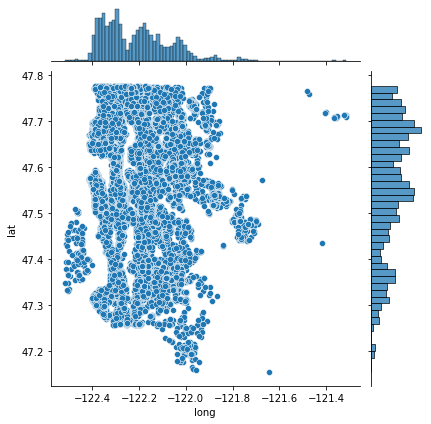

In [29]:
sns.jointplot(data=houses, x="long", y="lat")

In [49]:
price_binned = pd.qcut(houses.price, q=5, labels=["{}".format(i) for i in range(5)])

price_binned.name = "price_quintile"

houses_binned = pd.concat([houses, price_binned], axis=1)
houses_binned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_quintile
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,3
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429,2


In [50]:
houses_binned.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_quintile
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387,100.000000,0
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500,186.046512,0
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,0.0,1943,0.0,98168,47.4808,-122.315,860,9000,110.958904,0
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250,95.348837,0
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570,158.653846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750,668.750000,4
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345,605.434783,4
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730,696.663296,4
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,703.187251,4


In [52]:
%matplotlib widget
sns.jointplot(data=houses_binned, x="long", y="lat", hue="price_quintile", alpha=0.2);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

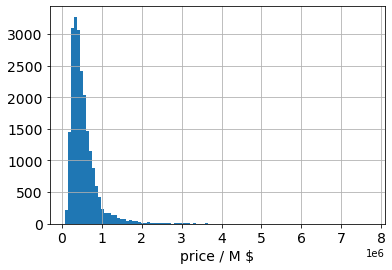

In [61]:
plt.close()
%matplotlib inline
houses.price.hist(bins=100)
plt.xlabel("price / M $", fontdict={"fontsize":14})
#plt.ylabel(, labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [63]:
houses.describe().price.round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64